# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

## **Business Understanding**

The goal of this project is to analyze a dataset of 426K used car listings to identify the key factors that influence car prices. Additionally, we aim to develop a predictive model that estimates used car prices based on these factors. The results will provide recommendations to a used car dealership regarding the influencing factors, helping them optimize pricing and inventory selection.

The dataset includes various attributes such as year, make, model, condition, mileage, fuel type, and transmission. To achieve this goal, we will perform a thorough data analysis to determine which factors have the strongest impact on price variation.

The tools and technologies that will be used in this project include Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Streamlit, and Statsmodels. The project will be developed using cloud-based Jupyter Notebooks/Google Colab and later hosted on GitHub for collaboration and version control.

As part of the CRISP-DM framework, key aspects of the Business Understanding phase that will be considered in this project include:

**Requirements**

*   Data cleaning and preprocessing to handle missing values.
*   Feature engineering to create useful predictors.
*   Model training and evaluation

**Assumptions**

*   The actual data which can be assumed as historical data will be usedListeneintrag to predict future pricing trends.

**Constraints**

*   Missing or incomplete data may impact model accuracy.
*   External factors such as market trends and economic conditions are not included in the dataset.

**Potential Risks**

*   Poor data quality could negatively impact the accuracy of the models
*   Model overfitting may lead to poor generalization for new data

**Strategies**

*   Implement cross-validation techniques to prevent overfitting and improve model robustness.

**Key Terminology**

*   Regression Model
*   Feature Engineering.
*   MAE (Mean Absolute Error)
*   Outliers
*   One-hot Encoding

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading data into Pandas DataFrame
data_vehicles = pd.read_csv("vehicles.csv")

In [5]:
# Information about the number of rows and columns
row = data_vehicles.shape[0]
columns = data_vehicles.shape[1]
print(f"Number of rows: {row}")
print(f"Number of columns: {columns}")

Number of rows: 426880
Number of columns: 18


**@Info**

The dataset has 426880 rows and 18 columns.

In [6]:
# Print the first 5 rows to check the structure
data_vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
# Print the titles of columns
data_vehicles.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [8]:
# To find out the information about the data
data_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**@Info**

With using info(), we can see the informations about data type (DataFrame) and number of entries

RangeIndex: 426880 entries, 0 to 426879
Shows the number of rows and the index range (from 0 to 426879).

The total number of columns is 18:
Lists all column names and their order in the DataFrame are also provided.

Each column shows how many non-null values it contains.
If the number is less than the total rows 426880, the column has missing values.

In [9]:
# Display summary statistics for numerical columns
data_vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**@Info**

The code describe() provides summary statistics for numerical columns in the data_vehicles DataFrame. It helps in exploratory data analysis by giving insights into data distribution, central tendency, and variability.

In [10]:
# Display summary statistics for categorical columns
data_vehicles.describe(include="object")

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [11]:
# Check for Missing Values
# Count missing values in each column
mis_values = data_vehicles.isnull().sum()
mis_values

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [12]:
# To display the columns with missing values
mis_values[mis_values>0]

,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242
transmission,2556
VIN,161042


In [13]:
# To check again the type data of each column, which we have displayed using data_vehicles.info()
data_vehicles.dtypes

,0
id,int64
region,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object
odometer,float64


In [14]:
# If any numerical columns are mistakenly stored as object, convert them to numeric:
data_vehicles['odometer']=pd.to_numeric(data_vehicles['odometer'], errors= 'coerce')
data_vehicles['year']=pd.to_numeric(data_vehicles['year'], errors= 'coerce')

**@Info**

Converting the values 'year' and 'odometer' into numeric and replcaing non-numeric values of these columns ('unknown', 'N/A') with NaN.



In [15]:
# Drop columns, which are unnecessary
data_v= data_vehicles.drop(columns=['id', 'VIN'])

**@Info**

Removing unnecessary columns such as id and VIN

Text(0, 0.5, 'Yearr')

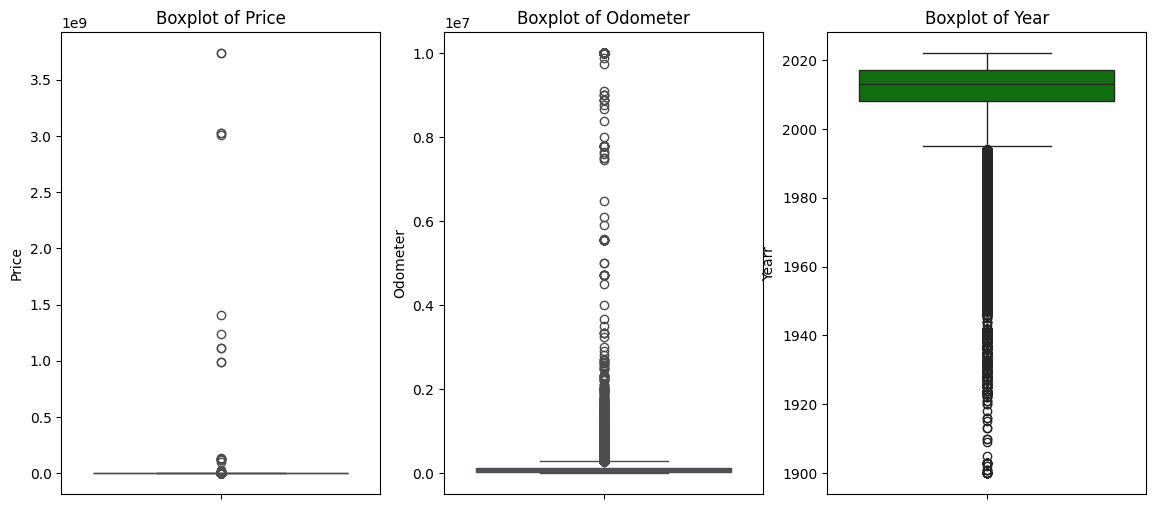

In [16]:
# Boxplots for numeric variablesTo for examining outliers

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))  # 1 row, 2 columns

sns.boxplot(y=data_v['price'], ax=axes[0], color='blue')
axes[0].set_title('Boxplot of Price')
axes[0].set_ylabel('Price')

sns.boxplot(y=data_v['odometer'], ax=axes[1], color='red')
axes[1].set_title("Boxplot of Odometer")
axes[1].set_ylabel("Odometer")

sns.boxplot(y=data_v['year'], ax=axes[2], color='green')
axes[2].set_title("Boxplot of Year")
axes[2].set_ylabel("Yearr")


**@Info**

Examine Outliers

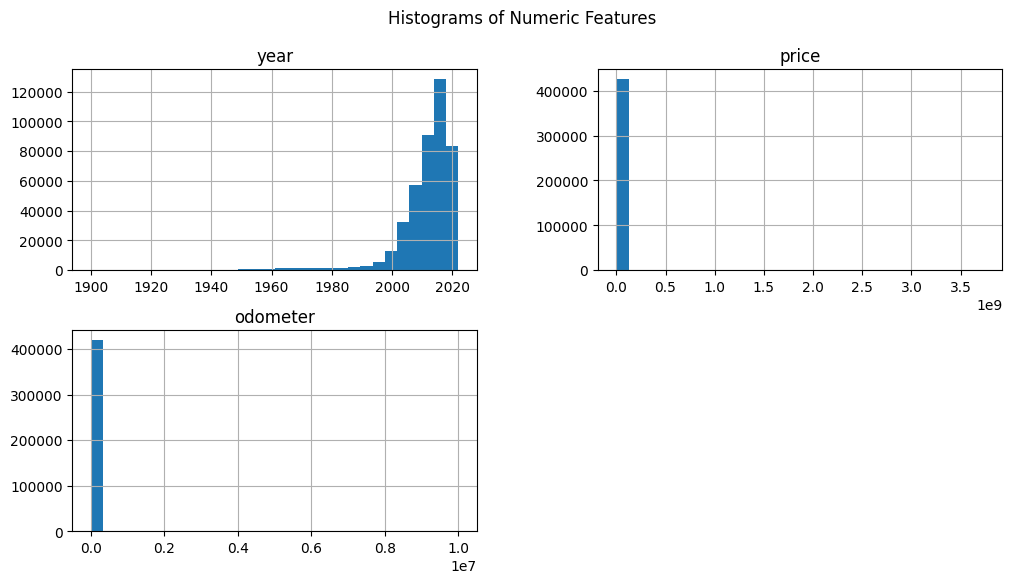

In [17]:
# Histograms for numeric variables
data_v[['year', 'price', 'odometer']].hist(bins=30, figsize=[12,6])
plt.suptitle("Histograms of Numeric Features")
plt.show()

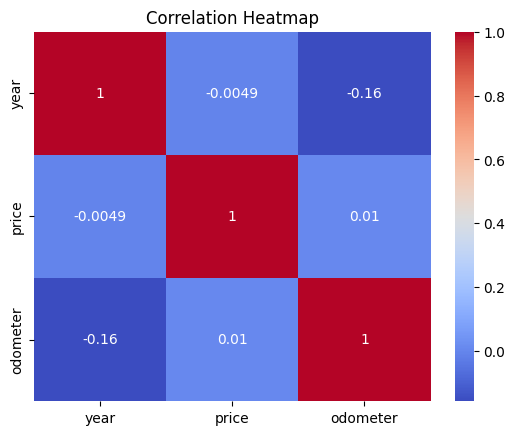

In [18]:
# Examining the correlation
data_num = data_vehicles[['year','price', 'odometer']]
corr = data_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**@Info**

**Year vs. Price (-0.0049)**

The car’s year does not strongly affect its price in this dataset.

**Odometer vs. Price (0.01)**

no relationship between mileage and price in this dataset.
Typically, higher mileage leads to lower prices, but this weak correlation might suggest price is affected more by other features

**Year vs. Odometer (-0.16)**

Weak negative correlation, which means older cars tend to have higher odometer readings, which is correct

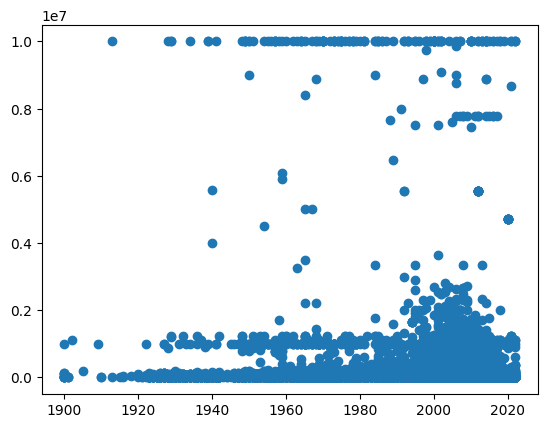

In [29]:
plt.scatter(x=[data_v['year']], y=data_v['odometer'])

**@Info**

Some values are NaN, so the plot cannot be accurately interpreted.

In [ ]:
#Find unique values in categorical columns

categ_col = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

for i in categ_col:
    print(f"\nUnique values in '{i}':")
    print(data_v[i].unique())


Unique values in 'manufacturer':
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']

Unique values in 'model':
[nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']

Unique values in 'condition':
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']

Unique values in 'cylinders':
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']

Unique values in 'fuel':
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']

Unique values in 'title_status':
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']

Unique 

**@Info**

Display the unique values of the categorical columns

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

**@Info**

During my analysis of the vehicles.csv dataset, I observed the following key points:

*   Some columns are unnecessary and do not contribute to the analysis.
*   Certain columns contain missing values.
*   Outliers are present in numerical columns, which may affect model accuracy.

To ensure reliable dataset for modeling, the data vehicles.csv requires proper preprocessing, which I will carry out in the following step-by-step process.

**Process for data cleaning & preparation**

1. Handle missing values.
2. Remove outliers.
3. Convert categorical variables.
4. Engineering new features.
5. Normalize and scaling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Reloading the dataset
data_vehicles = pd.read_csv('vehicles.csv')


print(f"\033[1m2.1 Step:\033[0m")
print('Reloading the dataset into data_vehicles')

2.1 Step:
Reloading the dataset into data_vehicles


In [3]:
# If any numerical columns are mistakenly stored as object, convert them to numeric:
data_vehicles['odometer']=pd.to_numeric(data_vehicles['odometer'], errors= 'coerce')
data_vehicles['year']=pd.to_numeric(data_vehicles['year'], errors= 'coerce')
data_vehicles['price']=pd.to_numeric(data_vehicles['price'], errors= 'coerce')

print(f"\033[1m2.2 Step:\033[0m")
print("Converting the values 'year', 'odometer' and 'price' into numeric and replcaing non-numeric values of these columns ('unknown', 'N/A') with NaN.")

2.2 Step:
Converting the values 'year', 'odometer' and 'price' into numeric and replcaing non-numeric values of these columns ('unknown', 'N/A') with NaN.


**@Info**

Converting the values 'year', 'odometer' and 'price' into numeric and replcaing non-numeric values of these columns ('unknown', 'N/A') with NaN.

In [4]:
# Droping Unnecessary Columns and keeping useful data
data_v = data_vehicles.drop(columns=['id', 'VIN', 'region', 'size', 'state', 'paint_color', 'model','transmission', 'type', 'drive', ])

print(f"\033[1m2.3 Step:\033[0m")
print("Unnecessary columns have been removed.")
data_v.info()

2.3 Step:
Unnecessary columns have been removed.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.1+ MB


In [5]:
# Handle Missing Values
# 1. Droping columns with missing values more than 50%
threshold = 0.5
data_v = data_v.dropna(thresh=threshold*len(data_v), axis=1)

# 2. Filling the missing numerical values with the median
col_num = data_v.select_dtypes(include=['int64', 'float64']).columns
data_v.loc[:, col_num] = data_v[col_num].apply(lambda x: x.fillna(data_v[col_num].median()))

# 3. Filling the missing categorical values with "unknown"
col_cat = data_v.select_dtypes(include=['object']).columns
data_v.loc[:, col_cat] = data_v[col_cat].fillna('unknown')

print(f"\033[1m2.4 Step:\033[0m")
print("In this section, the missing values have been handled.")
print(f"\033[1mInfo about new dataset:\033[0m")
data_v.info()
data_v.columns

2.4 Step:
In this section, the missing values have been handled.
Info about new dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  426880 non-null  object 
 3   condition     426880 non-null  object 
 4   cylinders     426880 non-null  object 
 5   fuel          426880 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  426880 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.1+ MB


Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status'],
      dtype='object')

**@Info**

**Handle Missing Values**

In this section, the missing values have been handled as follows:*

* The columns with excessive missing values have been removed.
* The missing numerical values have been filled with the median.
* The missing categorical values have been with "unknown".

In [6]:
# Handling the outliers
# Calculate Q1, Q3, and IQR of price
Q1_price = data_v['price'].quantile(0.25)
Q3_price = data_v['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Upper and lower bounds
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

print("The lower bound of price is:",lower_bound_price)
print("The upper bound of price is:", upper_bound_price)

The lower bound of price is: -24978.625
The upper bound of price is: 57364.375


**@Info**

The calculated lower and upper price are not realistic. I am going to set the lower and upper price, oldometer and year manuelly.

In [7]:
# Handling the outliers
data_v = data_v[((data_v['price'] > 1000) & (data_v['price']<300000))]
data_v = data_v[(data_v['odometer'] < 300000)]
data_v = data_v[(data_v['year']< 2025)]

print(f"\033[1m2.5 Step:\033[0m")
print("Outliers of numeric columns have been removed.")


2.5 Step:
Outliers of numeric columns have been removed.


In [12]:
# Feature Engineering

#creating a column for the age of car regarding the current year 2025
data_v['car_age'] = 2025 - data_v['year']

# Log transformation to reduces extreme values of price and odometer
data_v['log_price'] = np.log1p(data_v['price'])
data_v['log_odometer'] = np.log1p(data_v['odometer'])

data_v2 =data_v.drop(columns=['year', 'odometer'])

print(f"\033[1m2.6 Step:\033[0m")
print('Feature engineering has been done.')

print('The first 5 values of log_price:')
print(data_v['log_price'].head())
print('The first 5 values of log_odometer:')
print(data_v['log_odometer'].head())

2.6 Step:
Feature engineering has been done.
The first 5 values of log_price:
27    10.422013
28    10.025307
29    10.586357
30    10.341452
31     9.615872
Name: log_price, dtype: float64
The first 5 values of log_odometer:
27    10.966887
28    11.173669
29     9.860632
30    10.624371
31    11.759793
Name: log_odometer, dtype: float64


**@Info**

**Feature Engineering**

In this section, the following steps have been done for feature engineering.

*  Car price is influenced by age
*  Log transformation reduces extreme values

This process helps models better understand the data and relationships in the data.

In [13]:
# Encode categorical variables using One-Hot Encoding
import pandas as pd
# data_v_encoded = pd.get_dummies(data_v2, columns=[ 'model', 'condition', 'cylinders', 'title_status', 'transmission', 'type', 'drive', 'fuel'], drop_first=True)
# removing some columns for sucsessful running
data_v2 = data_v2.drop(columns='manufacturer')
data_v_encoded = pd.get_dummies(data_v2, columns=[  'condition', 'cylinders','fuel', 'title_status' ], drop_first=True)

print(f"\033[1m2.7 Step:\033[0m")
print('Categorical features have been encoded, so they have been converted into numerical values')

2.7 Step:
Categorical features have been encoded, so they have been converted into numerical values


**@Info**

**Encode categorical variables**

In this section, categorical features have been converted into numerical values using One-Hot Encoding, since machine learning models require this.

In [14]:
# Normalizing and scaling features

#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_v_encoded[['car_age', 'log_odometer']] = scaler. fit_transform(data_v_encoded[['car_age', 'log_odometer']])
data_v_encoded = data_v_encoded.drop(columns=['price'])
print(f"\033[1m2.8 Step:\033[0m")
print('Features car_age and log_odometer have been normalized and scaled')

2.8 Step:
Features car_age and log_odometer have been normalized and scaled


@Info

**Normalize and scale features**

In this section, features car_age and odometer have been normalized and scaled for better Machine learning models perform.

In [15]:
#Since the running statly brocken, I tried to find out the problem
print(f"Dataset shape: {data_v_encoded.shape}")  # Check total rows & columns
print(f"Memory usage: {data_v_encoded.memory_usage(deep=True).sum() / (1024 * 1024)} MB")

Dataset shape: (373322, 28)
Memory usage: 20.2935733795166 MB


In [16]:
col_memory = data_v_encoded.memory_usage(deep=True).sort_values(ascending=False)
print(col_memory.head(50))  # Show top 50 memory-heavy columns

Index                      2986576
log_price                  2986576
log_odometer               2986576
car_age                    2986576
cylinders_other             373322
title_status_salvage        373322
title_status_rebuilt        373322
title_status_parts only     373322
title_status_missing        373322
title_status_lien           373322
fuel_unknown                373322
fuel_other                  373322
fuel_hybrid                 373322
fuel_gas                    373322
fuel_electric               373322
cylinders_unknown           373322
cylinders_6 cylinders       373322
cylinders_8 cylinders       373322
cylinders_5 cylinders       373322
cylinders_4 cylinders       373322
cylinders_3 cylinders       373322
cylinders_12 cylinders      373322
condition_unknown           373322
condition_salvage           373322
condition_new               373322
condition_like new          373322
condition_good              373322
condition_fair              373322
title_status_unknown

In [17]:
# Splitting the dataset into features (X) and target variable (y).
from sklearn.model_selection import train_test_split
X= data_v_encoded.drop(columns=['log_price'])
y= data_v_encoded['log_price']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(f"\033[1m2.9 Step:\033[0m")

print('The dataset has been splitted into training and testing sets')
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")

print(f"Training set: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"Testing set: {X_test.shape[0]} rows, {X_test.shape[1]} columns")

2.9 Step:
The dataset has been splitted into training and testing sets
Missing values in X: 0
Missing values in y: 0
Training set: 298657 rows, 27 columns
Testing set: 74665 rows, 27 columns


In [18]:
# Saving the clean and prepared dataset
cleaned_file = 'data_v_clean.csv'
data_v_encoded.to_csv('data_v_clean.csv', index=False)

print(f"The cleaned dataset saved as {cleaned_file}. It is ready for modeling.")

The cleaned dataset saved as data_v_clean.csv. It is ready for modeling.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [19]:
# Loading the cleaned dataset
data_v_clean = pd.read_csv('data_v_clean.csv')

# Splitting the data into training and testing sets
X = data_v_clean.drop(columns=['log_price'])
y = data_v_clean['log_price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"Testing set: {X_test.shape[0]} rows, {X_test.shape[1]} columns")

Training set: 298657 rows, 27 columns
Testing set: 74665 rows, 27 columns


In [20]:
# To check if X_train contains objective features
print(X_train.dtypes[X_train.dtypes == 'object'])

Series([], dtype: object)


In [21]:
# Train Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# defind Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# Calculate mean-absolute-error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
# Calculate mean-squared-error
mse_lr = mean_squared_error(y_test, y_pred_lr)
# Calculate r2-score
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R2): {r2_lr}")


Mean Absolute Error (MAE): 0.46610869209414457
Mean Squared Error (MSE): 0.3994685456846515
R-squared (R2): 0.43253510082547897


**@Info:**

**Train Linear Regression**

R-squared (0.54): Model explains 54% of the variation in car prices but could be improved.
Average log price prediction error is 0.41 and the average squared error  is 0.32

In [22]:
# Using Polynomial Features for Regression Modeling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
# Reloading the cleaned dataset
data_v_clean = pd.read_csv('data_v_clean.csv')

# Splitting the data into training and testing sets
X = data_v_clean.drop(columns=['log_price'])
y = data_v_clean['log_price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
# Create Polynomial Features (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)


In [25]:
X_test_poly = poly.transform(X_test)

print(f"Original feature count: {X_train.shape[1]}")
print(f"New feature count after Polynomial Transformation: {X_train_poly.shape[1]}")

Original feature count: 27
New feature count after Polynomial Transformation: 405


In [26]:
# Train Linear Regression on Polynomial Features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [27]:
# Predict on Test Data
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Model Performance
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree=2) Performance:")
print(f"MAE: {mae_poly}")
print(f"MSE: {mse_poly}")
print(f"R² Score: {r2_poly}")

Polynomial Regression (Degree=2) Performance:
MAE: 0.35640948690949337
MSE: 0.24351676453424256
R² Score: 0.6540723475564525


@Info

**Polynomial Regression (Degree=2) Performance:**

MAE: 0.35640948690949337
MSE: 0.24351676453424256
R² Score: 0.6540723475564525

all Results are improved in comparison to Line Regression

In [28]:
#Train & Evaluate Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance:\nMAE: {mae_rf}\nMSE: {mse_rf}\nR² Score: {r2_rf}")

Random Forest Performance:
MAE: 0.21530979481187437
MSE: 0.14762480823060617
R² Score: 0.7902916316611067


**@Info**

**Random Forest Performance:**
MAE: 0.21530979481187437
MSE: 0.14762480823060617
R² Score: 0.7902916316611067

All three results are improved in comparison to those of the last two models

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [31]:
# Comparing the results of all three models
print("Model Performance:")
print("------------------")
print('Model 1')
print(f"Linear Regression Performance:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R2 Score: {r2_lr}")
print("------------------")
print('Model 2')
print(f"Polynomial Regression (Degree=2) Performance:")
print(f"MAE: {mae_poly}")
print(f"MSE: {mse_poly}")
print(f"R2 Score: {r2_poly}")
print("------------------")
print('Model 3')
print(f"Random Forest Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R2 Score: {r2_rf}")

Model Performance:
------------------
Model 1
Linear Regression Performance:
MAE: 0.46610869209414457
MSE: 0.3994685456846515
R2 Score: 0.43253510082547897
------------------
Model 2
Polynomial Regression (Degree=2) Performance:
MAE: 0.35640948690949337
MSE: 0.24351676453424256
R2 Score: 0.6540723475564525
------------------
Model 3
Random Forest Performance:
MAE: 0.21530979481187437
MSE: 0.14762480823060617
R2 Score: 0.7902916316611067


**@Info**

**Model Performance:**

**Model 1**

Linear Regression Performance:
MAE: 0.46610869209414457
MSE: 0.3994685456846515
R2 Score: 0.43253510082547897

**Model 2**

Polynomial Regression (Degree=2) Performance:
MAE: 0.35640948690949337
MSE: 0.24351676453424256
R2 Score: 0.6540723475564525

**Model 3**
Random Forest Performance:
MAE: 0.21530979481187437
MSE: 0.14762480823060617
R2 Score: 0.7902916316611067


**Random Forest** is the best model. It has the lowest errors and highest accuracy (R2 = 0.79).
Polynomial Regression is an improvement over Linear Regression but not as strong as Random Forest.
Linear Regression with R2 = 0.43 does not capture car price variations well.

<Axes: xlabel='log_price'>

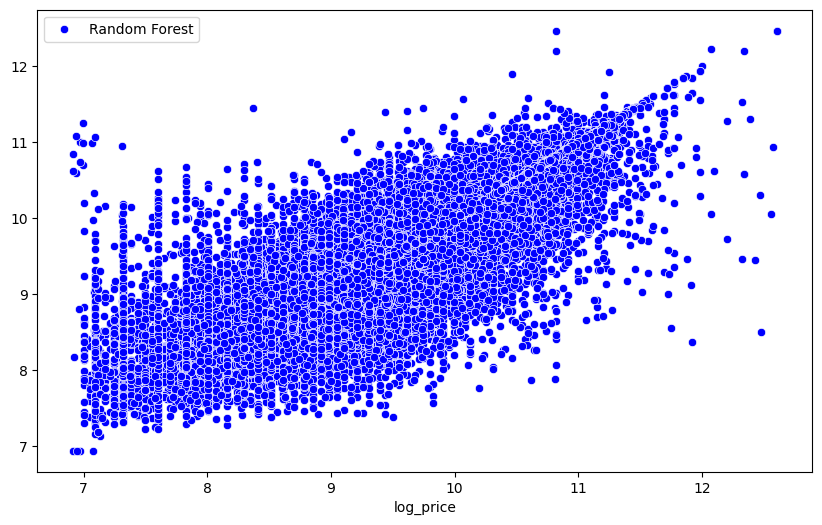

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='Random Forest')

<Axes: xlabel='log_price'>

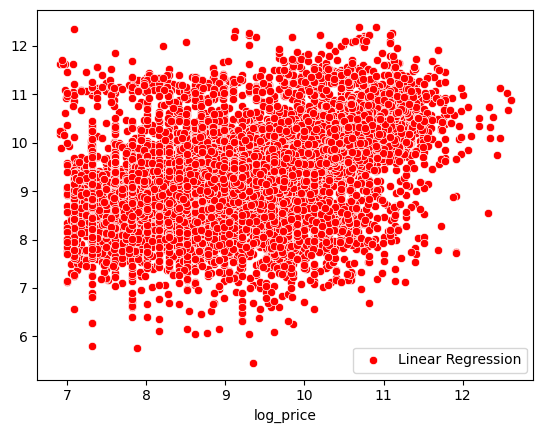

In [39]:
sns.scatterplot(x=y_test, y=y_pred_lr, color='red', label='Linear Regression')

<Axes: xlabel='log_price'>

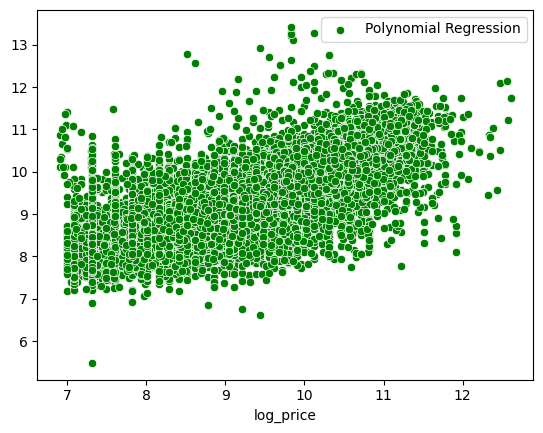

In [40]:
sns.scatterplot(x=y_test, y=y_pred_poly, color='green', label='Polynomial Regression')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Objective: **

The goal of this project was to analyze factors influencing used car prices and develop a predictive model to help dealers optimize pricing. Three regression models were trained and identified the best-performing one for price prediction.



Mileage and car age are the strongest price predictors.
Luxury brands retain value better, while older cars depreciate faster.

**Model Performance & Findings**

**(Comparison of different models and the best one selected)**

Three regression models were trained to predict used car prices:

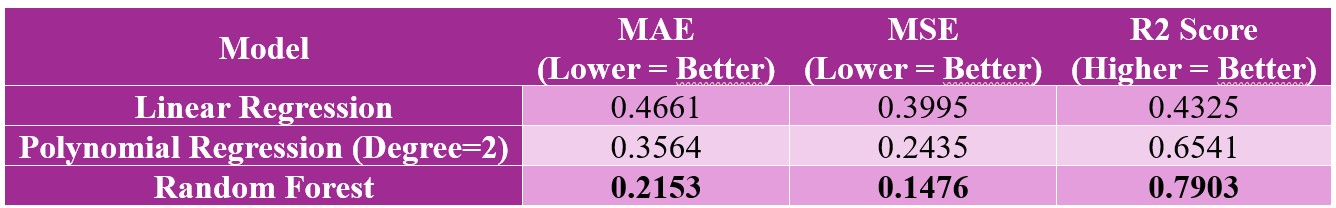



Best Model is Random Forest (R2 = 0.79, MAE = 0.21)
 It captures complex pricing patterns and performs best in reducing prediction errors.